In [8]:
import cv2
import matplotlib.pyplot as plt


In [15]:
catStableDiff = cv2.imread('catStableDiff.png', cv2.IMREAD_GRAYSCALE)

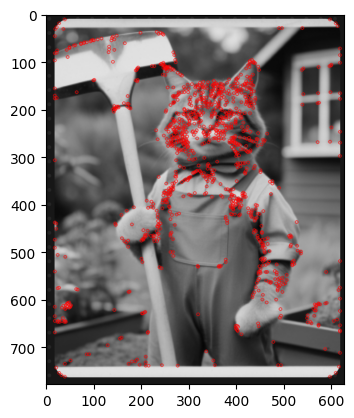

In [28]:
fast = cv2.FastFeatureDetector_create()

kp_fast = fast.detect(catStableDiff, None)
catStableDiffFAST = cv2.drawKeypoints(catStableDiff, kp_fast, None, color=(255,0,0))
plt.imshow(catStableDiffFAST, cmap='gray')

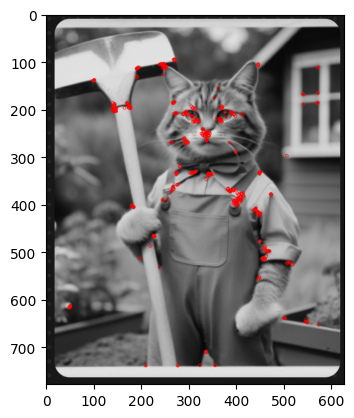

In [21]:
orb = cv2.ORB.create()
kp = orb.detect(catStableDiff, None)
kp, des = orb.compute(catStableDiff, kp)
catStableDiffORB = cv2.drawKeypoints(catStableDiff, kp, None, color=(255,0,0), flags=0)
plt.imshow(catStableDiffORB)

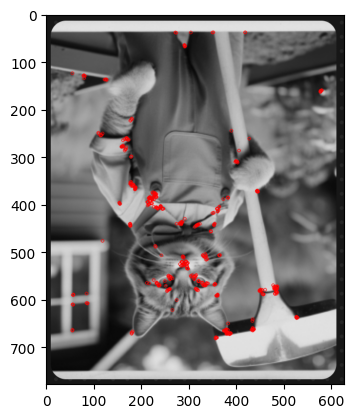

In [22]:
catStableDiffRotate = cv2.rotate(catStableDiff, cv2.ROTATE_180)
orb = cv2.ORB.create()
kp = orb.detect(catStableDiffRotate, None)
kp, des = orb.compute(catStableDiffRotate, kp)
catStableDiffRotateORB = cv2.drawKeypoints(catStableDiffRotate, kp, None, color=(255,0,0), flags=0)
plt.imshow(catStableDiffRotateORB)

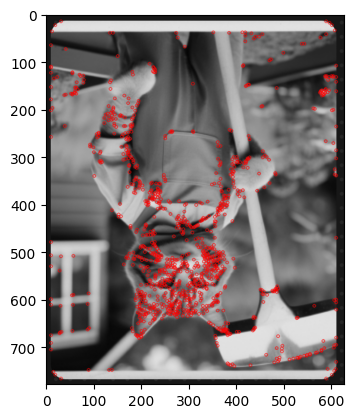

In [23]:
fast = cv2.FastFeatureDetector_create()

kp = fast.detect(catStableDiffRotate, None)
catStableDiffRotateFAST = cv2.drawKeypoints(catStableDiffRotate, kp, None, color=(255,0,0))
plt.imshow(catStableDiffRotateFAST, cmap='gray')

In [ ]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

kp1, des1 = orb.detectAndCompute(catStableDiff, None)
WebCam = cv2.VideoCapture(0)
if not WebCam.isOpened():
    raise IOError("Error")

while True:
    ret, frame = WebCam.read()
    frame = cv2.resize(frame, None, fx=0.8, fy = 0.8, interpolation=cv2.INTER_AREA)
    
    kp2, des2 = orb.detectAndCompute(frame, None)    
    matches = bf.match(des1,des2)

    if kp1.__len__()/len(matches) < 4:
        print("Katze")
    
    cv2.imshow('Input', frame)
    c = cv2.waitKey(1)
    if c == 27:
        break

WebCam.release()
cv2.destroyAllWindows()